In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

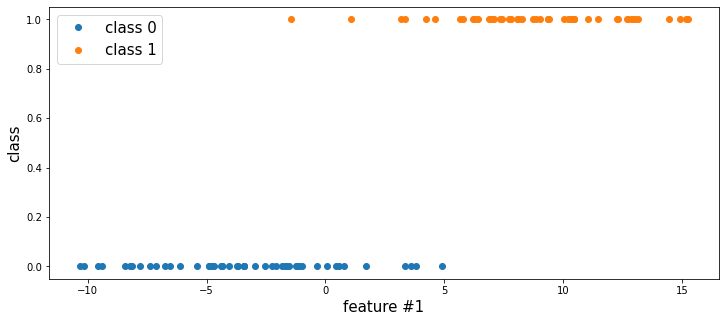

In [50]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples =100,
                 n_features = 1,
                 centers = 2,
                 cluster_std = 4.,
                 random_state=42,) 
# plot data
plt.figure(figsize=(12,5))
plt.plot(X[y==0],y[y==0],'o', label='class 0')
plt.plot(X[y==1],y[y==1],'o', label='class 1')

plt.xlabel('feature #1', fontsize=15)
plt.ylabel('class', fontsize=15)
plt.legend(fontsize=15)

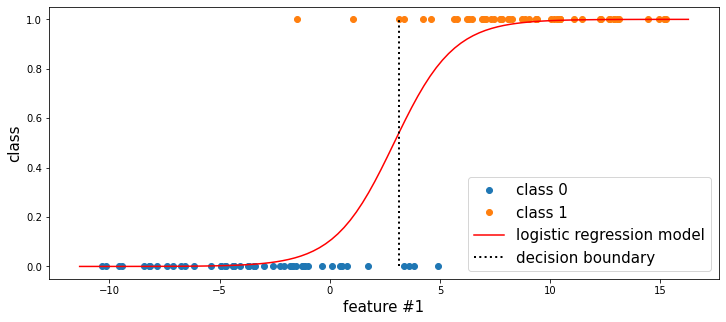

In [49]:
# plot data
plt.figure(figsize=(12,5))
plt.plot(X[y==0],y[y==0],'o', label='class 0')
plt.plot(X[y==1],y[y==1],'o', label='class 1')

# fit a logistic regression model
log_clf = LogisticRegression() 
log_clf.fit(X,y)

# plot model
x_plot = np.linspace(X.min()-1,X.max()+1,100)
y_plot = log_clf.predict_proba(x_plot[:,None])[:,1]
plt.plot(x_plot,y_plot,c='r', label='logistic regression model')

# decision boundary
decision_boundary = x_plot[y_plot >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,label='decision boundary')

plt.xlabel('feature #1', fontsize=15)
plt.ylabel('class', fontsize=15)
plt.legend(fontsize=15)

In [157]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples =300,
                 n_features = 2,
                 centers = 2,
                 cluster_std = 2.,
                 random_state=47,) 

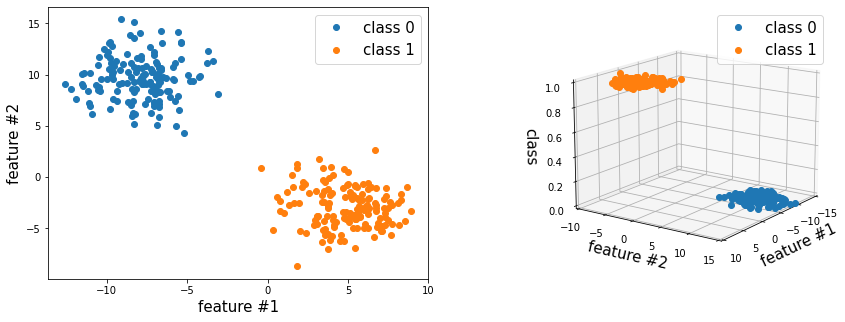

In [167]:
# fig 1
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'o', label='class 0')
ax1.plot(X[y==1,0],X[y==1,1],'o', label='class 1')

ax1.set_xlabel('feature #1', fontsize=15)
ax1.set_ylabel('feature #2', fontsize=15)
ax1.legend(fontsize=15)

# fig 2
ax2 = fig.add_subplot(1,2,2,projection='3d')

# plot data
ax2.plot(X[y==0,0],X[y==0,1],y[y==0],'o', label='class 0',zorder=5)
ax2.plot(X[y==1,0],X[y==1,1],y[y==1],'o', label='class 1',zorder=5)

ax2.view_init(elev=15,azim=35,)
ax2.set_xlim([-15,10])
ax2.set_ylim([-10,15])

ax2.set_xlabel('feature #1', fontsize=15)
ax2.set_ylabel('feature #2', fontsize=15)
ax2.set_zlabel('class', fontsize=15)
ax2.legend(fontsize=15)

In [171]:
from matplotlib.colors import ListedColormap

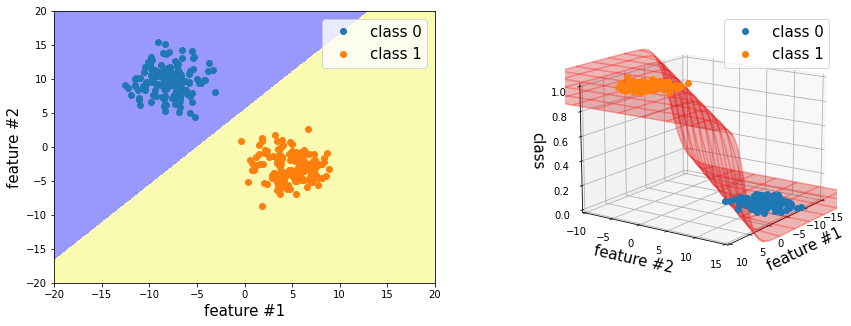

In [180]:
log_clf.fit(X,y)
xx = np.linspace(-20,20,500)
yy = np.linspace(-20,20,500)
XX,YY = np.meshgrid(xx,yy)
ZZ = log_clf.predict_proba(np.c_[(XX.ravel(), YY.ravel())])[:,1].reshape(XX.shape)

# fig 1
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'o', label='class 0')
ax1.plot(X[y==1,0],X[y==1,1],'o', label='class 1')

ax1.set_xlabel('feature #1', fontsize=15)
ax1.set_ylabel('feature #2', fontsize=15)
ax1.legend(fontsize=15)

ZZZ = log_clf.predict(np.c_[(XX.ravel(), YY.ravel())]).reshape(XX.shape)
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
ax1.contourf(XX, YY, ZZZ, cmap=custom_cmap)

# fig 2
ax2 = fig.add_subplot(1,2,2,projection='3d')

# plot data
ax2.plot(X[y==0,0],X[y==0,1],y[y==0],'o', label='class 0',zorder=5)
ax2.plot(X[y==1,0],X[y==1,1],y[y==1],'o', label='class 1',zorder=5)

c1 = ax2.plot_surface(XX, YY, ZZ, alpha=.3,color='r')
ax2.plot_wireframe(XX, YY, ZZ, color='r',alpha=0.3, rstride=50, cstride=50)

ax2.view_init(elev=15,azim=35,)
ax2.set_xlim([-15,10])
ax2.set_ylim([-10,15])

ax2.set_xlabel('feature #1', fontsize=15)
ax2.set_ylabel('feature #2', fontsize=15)
ax2.set_zlabel('class', fontsize=15)
ax2.legend(fontsize=15)

In [179]:
c1.

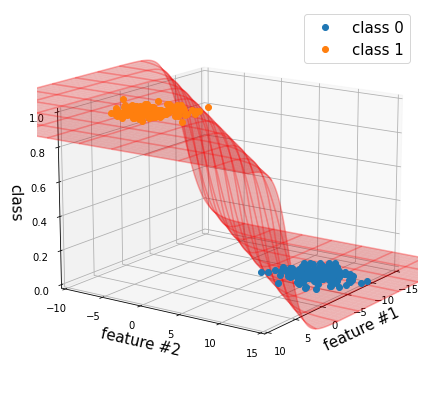

In [195]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(XX, YY, ZZ, alpha=.3,color='r')
ax.plot_wireframe(XX, YY, ZZ, color='r',alpha=0.3, rstride=50, cstride=50)

# plot data
ax.plot(X[y==0,0],X[y==0,1],y[y==0],'o', label='class 0',zorder=5)
ax.plot(X[y==1,0],X[y==1,1],y[y==1],'o', label='class 1',zorder=5)

ax.view_init(elev=15,azim=35,)

ax.set_xlim([-15,10])
ax.set_ylim([-10,15])

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)
ax.set_zlabel('class', fontsize=15)
ax.legend(fontsize=15)

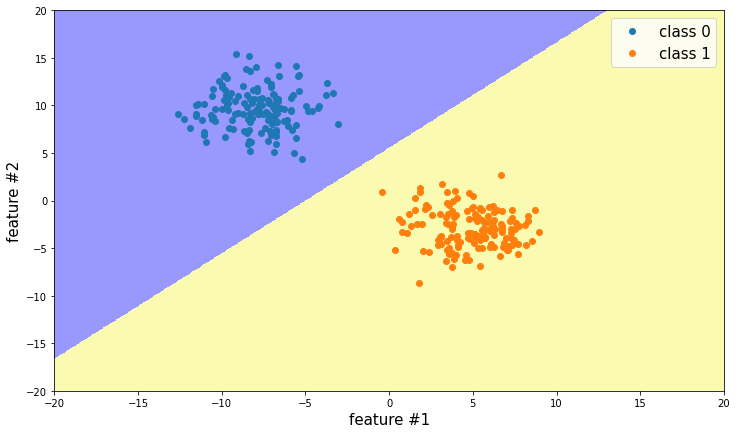

In [193]:
# plot data
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(X[y==0,0],X[y==0,1],'o', label='class 0')
ax.plot(X[y==1,0],X[y==1,1],'o', label='class 1')

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)
ax.legend(fontsize=15)

ZZZ = log_clf.predict(np.c_[(XX.ravel(), YY.ravel())]).reshape(XX.shape)
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
ax.contourf(XX, YY, ZZZ, cmap=custom_cmap)


In [106]:
%matplotlib inline

LogisticRegression()

In [98]:

ZZ.shape

(500, 500)

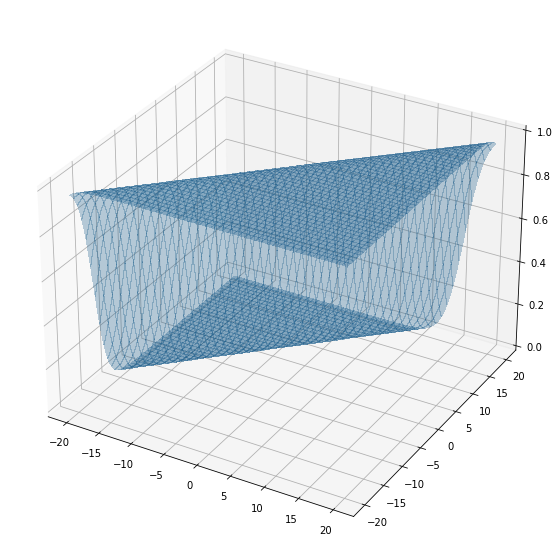

In [109]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(XX, YY, ZZ, alpha=.3,linewidth=0)